# Techniques of High Performance Computing: First Assignment
### Jan Zmazek, Scientific Computing
This Python package imports a triangular grid from a legacy vtk file, or creates a square grid with $m\cdot n$ nodes, and solves a diffusion equation
$$\begin{cases}
-\nabla\cdot\sigma(r)\nabla u(r)=f(r) & \text{in } \Omega\\
u(r)=0 &\text{on }\partial\Omega.
\end{cases}$$
using a finite element method. It consists of three classes of methods: grid (to read a vtk file), squareGrid (to create a square grid) and fem (finite element method).


## Examples
The first example is as simple with only 4 internal nodes:

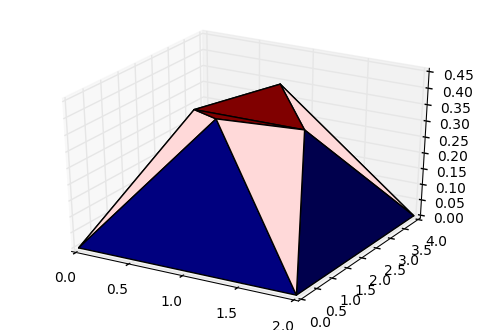

In [8]:
from main import solve

def f(x,y): return 1

def sigma(x,y): return 1

solve("example.vtk", sigma, f)


To easily generate examples, I additionally implemented a square_grid class which generates a square grid with number of points on x and y axis as arguments.

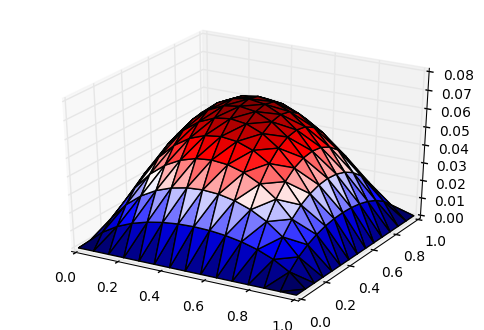

In [9]:
from main import solve_square
solve_square(15, 15, sigma, f)

In [4]:
from source.squareGrid import SquareGrid
import numpy as np
from source.fem import Fem
from scipy import sparse
grid = SquareGrid(3,3)
vertices_matrix = grid.get_vertices_matrix()
connectivity_matrix = grid.get_connectivity_matrix()
fem = Fem(vertices_matrix, connectivity_matrix)

In [5]:
P = np.delete(np.identity(10), [0,2,4,6], axis=1)

In [6]:
print(P)

[[ 0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]


In [7]:
np.delete(P, [0,2,4,6,8], axis=0)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])